In [24]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_validate
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [25]:
df = pd.read_csv("./Auto-cleaned.csv")
df.head()

,Unnamed: 0,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [26]:
feature = df.horsepower
target = df.mpg

In [27]:
K = []
R2_train = []
R2_test = []
for k in range(100):
    knn = KNeighborsRegressor(n_neighbors= k+1)
    cv = 3
    results = cross_validate(knn,feature.values.reshape(-1,1),target,return_train_score=True)
    K.append(k+1)
    R2_train.append(results['train_score'].mean())
    R2_test.append(results['test_score'].mean())
    
performance = pd.DataFrame()
performance['neighbors'] = K
performance['R2 train'] = R2_train
performance['R2 test'] = R2_test
performance

,neighbors,R2 train,R2 test
0,1,0.657581,0.235761
1,2,0.714580,0.347421
2,3,0.741189,0.385671
3,4,0.752878,0.396617
4,5,0.751033,0.385929
5,6,0.749685,0.384827
6,7,0.751805,0.367971
7,8,0.749027,0.385116
8,9,0.743683,0.386359
9,10,0.742021,0.383204


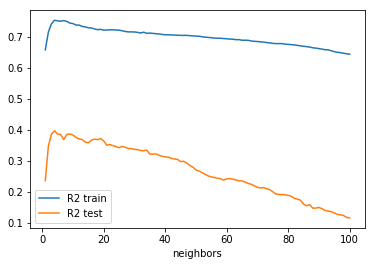

In [31]:
ax1 = performance.plot.line(x='neighbors',y='R2 train')
performance.plot.line(x='neighbors', y='R2 test',ax=ax1)

In [29]:
ix = performance['R2 test'].idxmax()
performance.iloc[ix]

neighbors    4.000000
R2 train     0.752878
R2 test      0.396617
Name: 3, dtype: float64

#### From 0 to 4 there is overfitting, 4 and up underfitting, right at 4 is peak performance

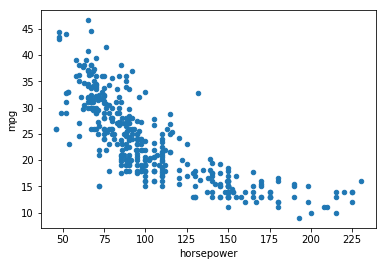

In [30]:
df.plot.scatter(x='horsepower',y='mpg')